**Análisis de Ventas de Clientes**

**Introducción**

En este proyecto, se realizará un análisis de las tendencias de ventas a lo largo del tiempo para identificar patrones y proporcionar recomendaciones.

**Objetivo**

Evaluar las tendencias de ventas a lo largo del tiempo y proporcionar recomendaciones para mejorar las ventas

**Análisis de Datos**

A continuación, cargaremos y analizaremos los datos.

In [2]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("C:\\Users\\Hp\\Downloads\\archive (2)\\ecommerce_customer_data_large.csv")

# Explorar los primeros datos
print(df.head())

   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        44605  2023-05-03 21:30:02             Home            177         1   
1        44605  2021-05-16 13:57:44      Electronics            174         3   
2        44605  2020-07-13 06:16:57            Books            413         1   
3        44605  2023-01-17 13:14:36      Electronics            396         3   
4        44605  2021-05-01 11:29:27            Books            259         4   

   Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
0                   2427         PayPal            31      1.0   John Rivera   
1                   2448         PayPal            31      1.0   John Rivera   
2                   2345    Credit Card            31      1.0   John Rivera   
3                    937           Cash            31      0.0   John Rivera   
4                   2598         PayPal            31      1.0   John Rivera   

   Age  Gender  Churn  
0   31  

In [3]:
# Eliminar valores nulos
df.dropna(inplace=True)

In [4]:
# Convertir la columna 'Purchase Date' a formato datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [5]:
# Mostrar la información del DataFrame
print(df.info())

# Verificar si hay valores nulos en el DataFrame
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 202618 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            202618 non-null  int64         
 1   Purchase Date          202618 non-null  datetime64[ns]
 2   Product Category       202618 non-null  object        
 3   Product Price          202618 non-null  int64         
 4   Quantity               202618 non-null  int64         
 5   Total Purchase Amount  202618 non-null  int64         
 6   Payment Method         202618 non-null  object        
 7   Customer Age           202618 non-null  int64         
 8   Returns                202618 non-null  float64       
 9   Customer Name          202618 non-null  object        
 10  Age                    202618 non-null  int64         
 11  Gender                 202618 non-null  object        
 12  Churn                  202618 non-null  int64    

In [14]:
# Ventas totales por categoría de producto
ventas_por_categoria = df.groupby('Product Category')['Total Purchase Amount'].sum()
print(ventas_por_categoria)

Product Category
Books          137145086
Clothing       138363540
Electronics    137884886
Home           138906211
Name: Total Purchase Amount, dtype: int64


In [7]:
# Agrupar por mes y sumar las ventas
ventas_por_mes = df.groupby(df['Purchase Date'].dt.to_period('M'))['Total Purchase Amount'].sum()
print(ventas_por_mes)

Purchase Date
2020-01    12567493
2020-02    11821574
2020-03    12556688
2020-04    12257415
2020-05    12664133
2020-06    12242023
2020-07    12456787
2020-08    13003738
2020-09    12281744
2020-10    12979568
2020-11    12449689
2020-12    12654907
2021-01    12450628
2021-02    11549281
2021-03    12419725
2021-04    12136608
2021-05    12783968
2021-06    12198008
2021-07    12702344
2021-08    12940243
2021-09    12106899
2021-10    12719307
2021-11    11908382
2021-12    12874811
2022-01    12425151
2022-02    11356543
2022-03    12655529
2022-04    12408079
2022-05    12789281
2022-06    12391640
2022-07    12978383
2022-08    12408057
2022-09    11953676
2022-10    12515257
2022-11    12736711
2022-12    12842762
2023-01    12852547
2023-02    11253093
2023-03    12785808
2023-04    12194799
2023-05    12718016
2023-06    12103066
2023-07    12298681
2023-08    12639422
2023-09     5267259
Freq: M, Name: Total Purchase Amount, dtype: int64


In [8]:
# Clientes que más compran
clientes_mayor_gasto = df.groupby('Customer ID')['Total Purchase Amount'].sum().sort_values(ascending=False).head(10)
print(clientes_mayor_gasto)

Customer ID
13805    43948
32869    43499
41829    43093
6633     43084
24051    42918
39717    42280
25102    41444
44509    41221
12095    41061
13400    40654
Name: Total Purchase Amount, dtype: int64


In [9]:
# Método de pago más utilizado
metodos_pago = df['Payment Method'].value_counts()
print(metodos_pago)

Payment Method
PayPal         67811
Credit Card    67517
Cash           67290
Name: count, dtype: int64


In [10]:
# Devoluciones por cliente
devoluciones_por_cliente = df.groupby('Customer ID')['Returns'].sum().sort_values(ascending=False)
print(devoluciones_por_cliente)

Customer ID
28703    10.0
24051    10.0
12667     9.0
41829     9.0
46689     9.0
         ... 
9044      0.0
9035      0.0
44257     0.0
44255     0.0
9058      0.0
Name: Returns, Length: 49146, dtype: float64


In [16]:
# Agrupar por 'Product Category' y sumar las cantidades vendidas
ventas_por_producto = df.groupby('Product Category')['Quantity'].sum()

# Encontrar el producto más vendido
producto_mas_vendido = ventas_por_producto.idxmax()  # Nombre del producto
cantidad_mas_vendida = ventas_por_producto.max()      # Cantidad total vendida

# Mostrar el resultado
print(f"El producto más vendido es: {producto_mas_vendido} con {cantidad_mas_vendida} unidades vendidas.")

El producto más vendido es: Clothing con 153372 unidades vendidas.


**Visualización**

**Ventas por Mes**

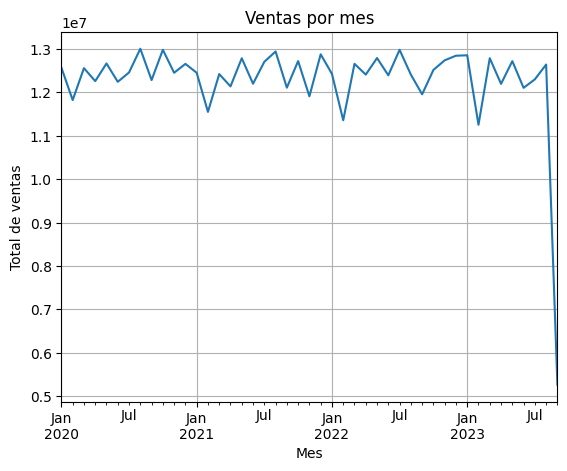

In [12]:
import matplotlib.pyplot as plt

ventas_por_mes.plot(kind='line')
plt.title('Ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Total de ventas')
plt.grid(True)
plt.show()

**Conclusiones**

Se observó una caída en las ventas a partir de julio de 2023.
- Posibles factores:
   1. Factores estacionales.
   2. Cambios en el comportamiento del consumidor.
   3. Competencia aumentada.

**Recomendaciones**

1. Implementar promociones y descuentos.
2. Realizar investigación de mercado.
3. Mejorar estrategias de marketing.